In [1]:
#first we need to install the required modules
!pip install -U segmentation_models dicom2nifti nilearn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 91.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 84.3 MB/s eta 0:00:00


In [2]:
#to test the models we first need the ACDC dataset, and the prep.py script which does the preprocessing of the images and the data augmentation
!gdown https://drive.google.com/uc?id=1qAUJtiPZfT3jm4V4qg-VRVucpZva-Qj_ -O /content/ACDC.zip && unzip -q /content/ACDC.zip -d /content
!gdown https://drive.google.com/uc?id=17qlna9cM-kI4B7XohwSHwPoD5jx0-Qlx -O /content/prep.py

Downloading...
From: https://drive.google.com/uc?id=1qAUJtiPZfT3jm4V4qg-VRVucpZva-Qj_
To: /content/ACDC.zip
100% 2.45G/2.45G [00:20<00:00, 122MB/s]
Downloading...
From: https://drive.google.com/uc?id=17qlna9cM-kI4B7XohwSHwPoD5jx0-Qlx
To: /content/prep.py
100% 15.1k/15.1k [00:00<00:00, 60.7MB/s]


In [3]:
#we also download the 3 models we trained to test them
!gdown https://drive.google.com/uc?id=1J8hIRo-GT6XrkWemIum8DjRisjff9lca -O /content/unet_pre-trained.h5
!gdown https://drive.google.com/uc?id=1H0NnKsYLr8l5o1Xe5vfUiZj4Y6STWUKB -O /content/linknet_pre-trained.h5
!gdown https://drive.google.com/uc?id=1_C-tAH4wee_fkPdO8INrvZ2IGpDW8xh0 -O /content/fpn_pre-trained.h5

Downloading...
From: https://drive.google.com/uc?id=1J8hIRo-GT6XrkWemIum8DjRisjff9lca
To: /content/unet_pre-trained.py
100% 294M/294M [00:01<00:00, 191MB/s]
Downloading...
From: https://drive.google.com/uc?id=1H0NnKsYLr8l5o1Xe5vfUiZj4Y6STWUKB
To: /content/linknet_pre-trained.py
100% 260M/260M [00:02<00:00, 118MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_C-tAH4wee_fkPdO8INrvZ2IGpDW8xh0
To: /content/fpn_pre-trained.py
100% 288M/288M [00:01<00:00, 210MB/s]


In [4]:
#before testing we need to run the prep.py to preprocess the raw data
%run prep.py

 - - - preprocessing started - - - 
x_train:	 shape:  (1000, 256, 256, 3) 	min:  0.0 max:  1.0
x_train_aug:	 shape:  (625, 256, 256, 3) 	min:  0.0 max:  1.0
y_train:	 shape:  (1000, 256, 256, 1) 	min:  0.0 max:  3.0 unique:  [0. 1. 2. 3.]
y_train_aug:	 shape:  (625, 256, 256, 1) 	min:  0.0 max:  3.0 unique:  [0. 1. 2. 3.]
x_test:		 shape:  (500, 256, 256, 3) 	min:  0.0 max:  1.0
x_test_aug:	 shape:  (250, 256, 256, 3) 	min:  0.0 max:  1.0
y_test:		 shape:  (500, 256, 256, 1) 	min:  0.0 max:  3.0 unique:  [0. 1. 2. 3.]
y_test_aug:	 shape:  (250, 256, 256, 1) 	min:  0.0 max:  3.0 unique:  [0. 1. 2. 3.]
 - - - preprocessing finished - - - 


In [19]:
#now we download the testing script
!gdown https://drive.google.com/uc?id=1TYJCoKBLi3sSmCWWxQ2JyjL-KbN8daju -O /content/test_models.py

Downloading...
From: https://drive.google.com/uc?id=1TYJCoKBLi3sSmCWWxQ2JyjL-KbN8daju
To: /content/test_models.py
100% 6.97k/6.97k [00:00<00:00, 28.0MB/s]


x_test: 	 (750, 256, 256, 3) 0.0 1.0 	 [[0.6211397 0.6211397 0.6211397]]
y_test: 	 (750, 256, 256, 1) 0.0 3.0 	 [[3.]] 	labels:  [0. 1. 2. 3.]
1/1 [==============================] - 1s 1s/step


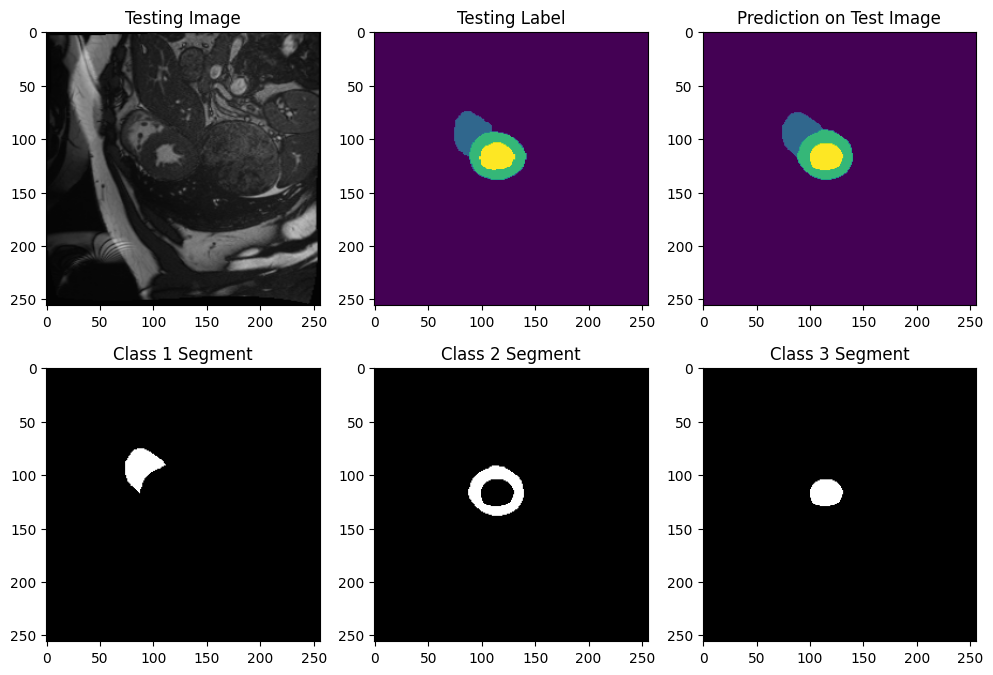

Mean IoU = 0.8295336040655772
Mean F1 Score = 0.9459695843670358


<Figure size 640x480 with 0 Axes>

In [21]:
#and we run the tests with input arguments model, and traintype
#if this fails, all you need to do is to click on /usr/local/lib/python3.10/dist-packages/efficientnet/__init__.py in the error message
#and delete "generic_utils" from "keras.utils.generic_utils.get_custom_objects().update(custom_objects)"
#it should be: "keras.utils.get_custom_objects().update(custom_objects)"
#then restart the runtime, and rerun this cell
%run test_models --model unet --traintype pre-trained

In [ ]:
#we can also download the generated data we want
from google.colab import files
files.download("/content/unet_pre-trained_prediction_plot.png")
files.download("/content/unet_pre-trained_test_results.csv")

x_test: 	 (750, 256, 256, 3) 0.0 1.0 	 [[0.6211397 0.6211397 0.6211397]]
y_test: 	 (750, 256, 256, 1) 0.0 3.0 	 [[3.]] 	labels:  [0. 1. 2. 3.]
1/1 [==============================] - 2s 2s/step


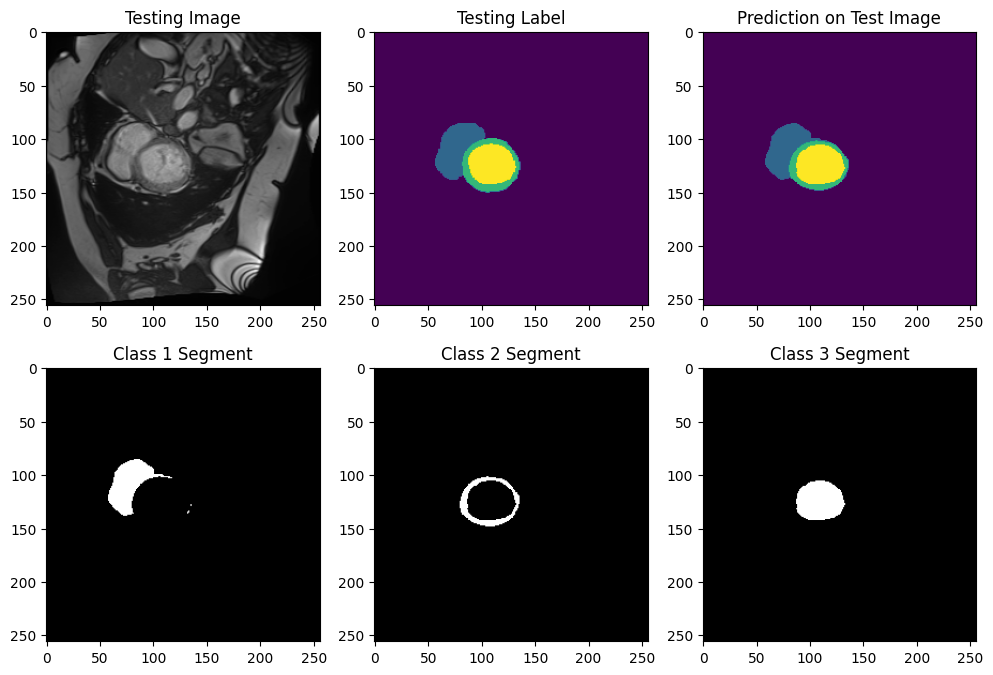

Mean IoU = 0.817011835495631
Mean F1 Score = 0.9405515829223979


<Figure size 640x480 with 0 Axes>

In [22]:
%run test_models --model linknet --traintype pre-trained

In [ ]:
from google.colab import files
files.download("/content/linknet_pre-trained_prediction_plot.png")
files.download("/content/linknet_pre-trained_test_results.csv")

x_test: 	 (750, 256, 256, 3) 0.0 1.0 	 [[0.6211397 0.6211397 0.6211397]]
y_test: 	 (750, 256, 256, 1) 0.0 3.0 	 [[3.]] 	labels:  [0. 1. 2. 3.]
1/1 [==============================] - 2s 2s/step


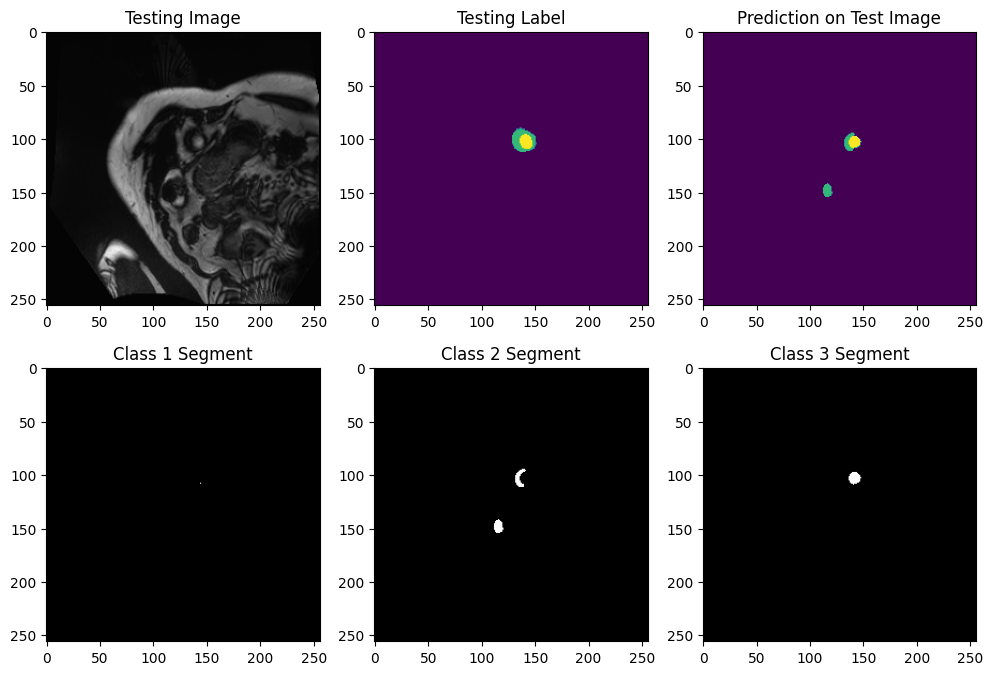

Mean IoU = 0.8225967901547749
Mean F1 Score = 0.9396602947185276


<Figure size 640x480 with 0 Axes>

In [23]:
%run test_models --model fpn --traintype pre-trained

In [ ]:
from google.colab import files
files.download("/content/fpn_pre-trained_prediction_plot.png")
files.download("/content/fpn_pre-trained_test_results.csv")

In [1]:
!pip freeze

absl-py==1.4.0
aiohttp==3.9.1
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.13.1
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.15.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.1
bqplot==0.12.42
branca==0.7.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.11.17
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.7
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==41.0.7
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.1
c